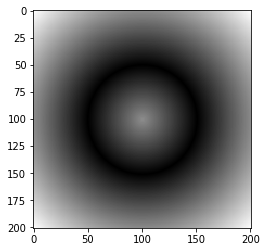

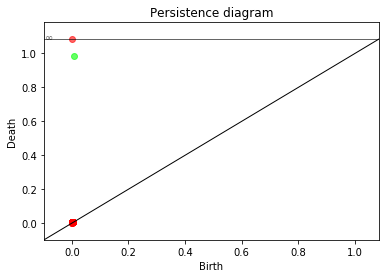

In [1]:
%matplotlib inline
import numpy as np
import math
import gudhi as gd
from matplotlib import pyplot as plt

N = 100
array = np.zeros((2*N+1,2*N+1))
xExtrem = 2;
yExtrem = 2;

bitmap = []
for i in range(0,2*N+1):
	for j in range (0,2*N+1):
		x = i/(2*float(N)+1)*2*float(xExtrem)-xExtrem
		y = j/(2*float(N)+1)*2*float(xExtrem)-xExtrem
		norm = math.sqrt( x*x + y*y )
		norm =  math.fabs(norm-1)
		array[i][j] = norm
		bitmap.append(norm)


#Here we will display our creation:
plt.imshow(array, cmap='gray', interpolation='nearest', vmin=np.amin(array), vmax=np.amax(array))
#plt.savefig('circle.png')
plt.show()

#Given the input data we can buld a Gudhi btmap cubical complex:
bcc = gd.CubicalComplex(top_dimensional_cells = bitmap, dimensions=[2*N+1,2*N+1])
#optional computation of persistence
persistence = bcc.persistence()
plt = gd.plot_persistence_diagram(persistence)
plt.show()


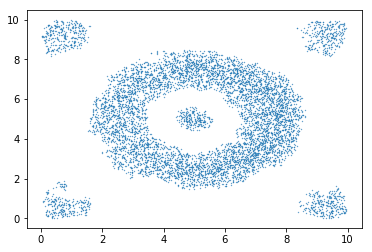

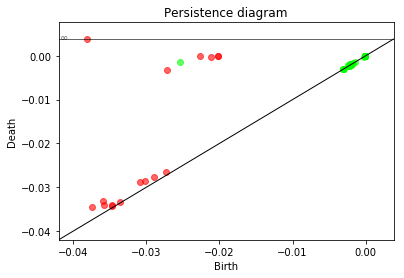

In [8]:
import numpy as np
import pandas as pd
import pickle as pickle
import gudhi as gd
from pylab import *
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from sklearn.neighbors.kde import KernelDensity

f = open("data/crater_tuto", 'rb')
#For python 3
crater = pickle.load(f,encoding='latin1')
#For python 2
# crater = pickle.load(f)
f.close()

plt.scatter(crater[:,0],crater[:,1],s=0.1)
plt.show()

#create 10 by 10 cubical complex:
xval = np.arange(0,10,0.05)
yval = np.arange(0,10,0.05)
nx = len(xval)
ny = len(yval)


#Now we compute the values of the kernel density estimator on the center of each point of our grid.
#The values will be stored in the array scores.
kde  =  KernelDensity(kernel='gaussian',  bandwidth=0.3).fit(crater)
positions = np.array([[u,v] for u in xval for v in yval ])
scores =  -np.exp(kde.score_samples(X= positions))

#And subsequently construct a cubical complex based on the scores.
cc_density_crater= gd.CubicalComplex(dimensions= [nx ,ny],top_dimensional_cells = scores)
# OPTIONAL
pers_density_crater  =cc_density_crater.persistence()
plt = gd.plot_persistence_diagram(pers_density_crater).show()